In [1]:
import pandas as pd
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
import matplotlib.pyplot as plt

### House price and water quality

In [2]:
df = pd.read_csv('data/house_price_water_quality.csv')

In [65]:
df.head()

,price,Result,Polluted,Ratio,house_price_age,Alameda,Amador,Butte,Calaveras,Del Norte,...,"p,p'-DDD","p,p'-DDE","p,p'-DDT",p-Xylene,pH,"s,s,s-Tributyl Phosphorotrithioate (DEF)",sec-Butylbenzene,tert-Butylbenzene,"trans-1,2-Dichloroethene","trans-1,3-Dichloropropene"
0,226149.0,120.0,True,12.0,32,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,226149.0,0.0,False,0.0,32,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,226149.0,360.0,True,36.0,32,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226149.0,25.0,True,5.0,32,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,226149.0,849.0,True,849.0,32,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
y = df['price']
X = df.drop('price', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xgb_reg = xgboost.XGBRegressor()
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_reg.fit(X_train, X_test, eval_set=eval_set)

AssertionError: 

In [ ]:
results = model.evals_result()

In [ ]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()

pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

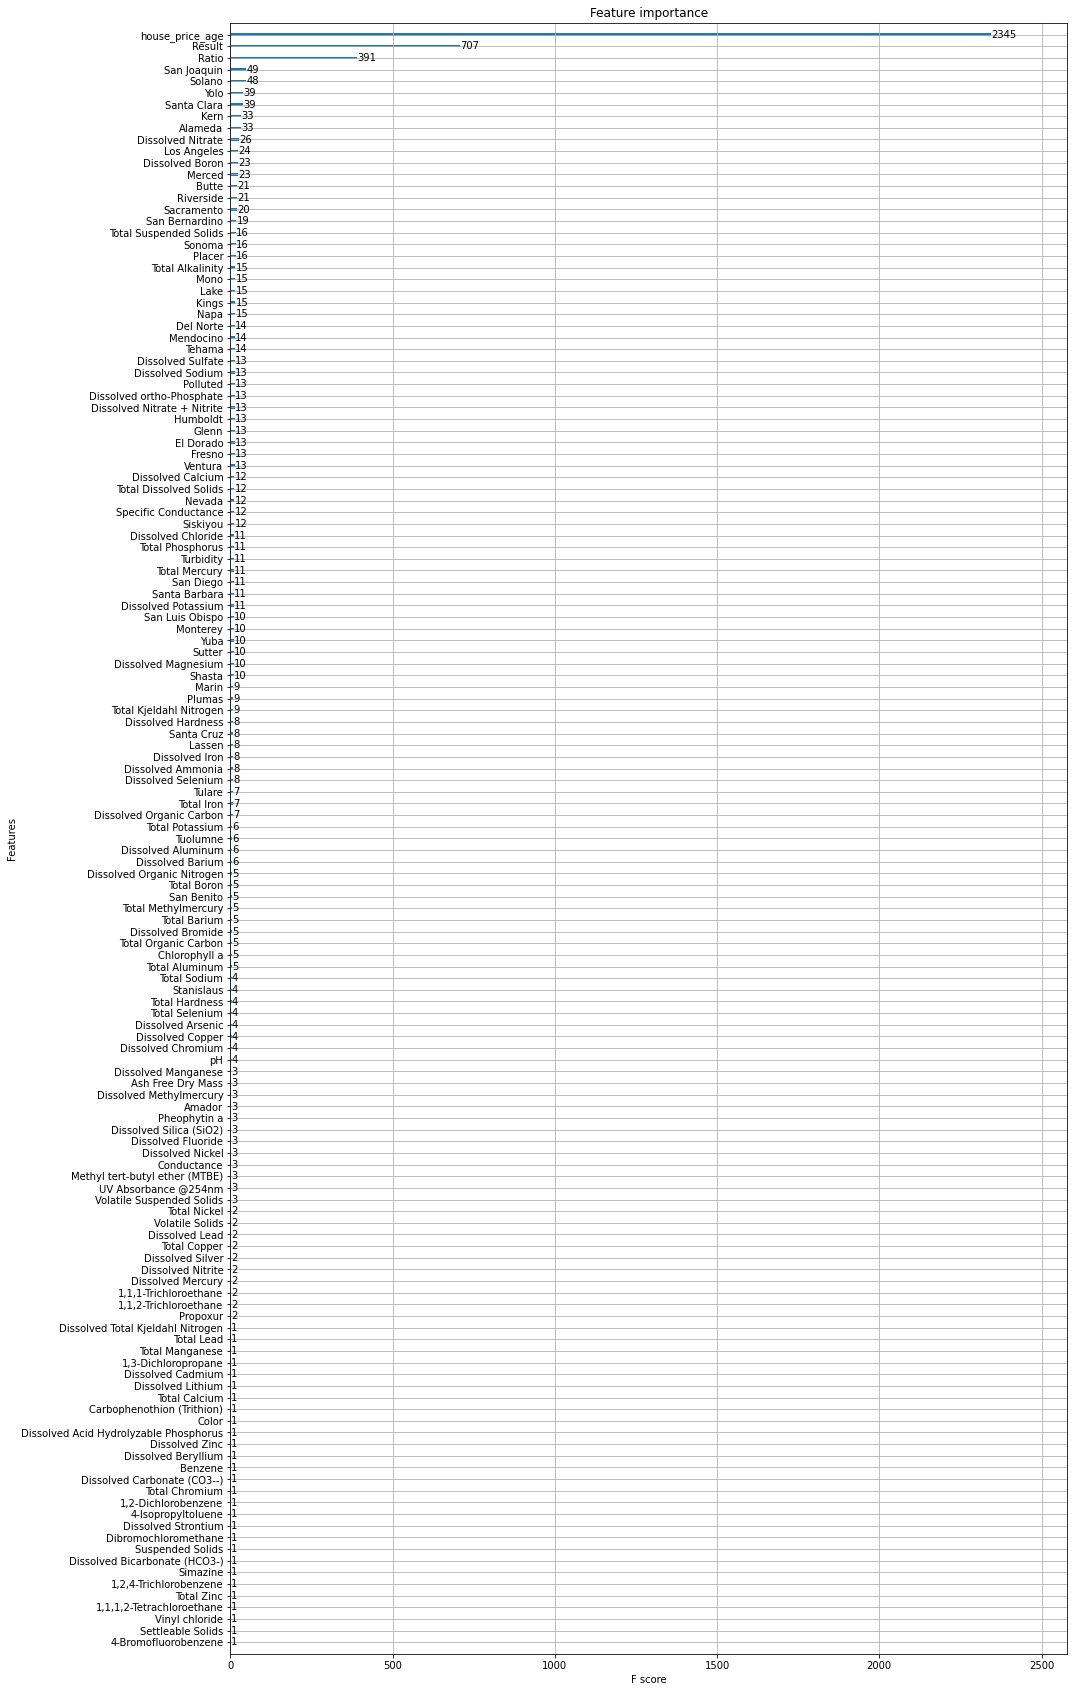

In [105]:
fig, ax = pyplot.subplots(figsize=(15,30))
plot_importance(xgb, ax=ax)

In [71]:
params = { 'max_depth': [3,6],
           'n_estimators': [100, 300, 500]，
          'learning_rate': [0.1, 0.3, 0.5]
         }

xgb_gscv = GridSearchCV(estimator=xgb, 
                        param_grid=params,
                        scoring='explained_variance', 
                        verbose=2)

xgb_gscv.fit(
    X_train, 
    y_train
)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................max_depth=3, n_estimators=100; total time= 4.2min
[CV] END ......................max_depth=3, n_estimators=100; total time= 4.0min
[CV] END ......................max_depth=3, n_estimators=100; total time= 4.1min
[CV] END ......................max_depth=3, n_estimators=100; total time= 4.0min
[CV] END ......................max_depth=3, n_estimators=100; total time= 3.9min
[CV] END ......................max_depth=3, n_estimators=300; total time=11.6min
[CV] END ......................max_depth=3, n_estimators=300; total time=12.3min
[CV] END ......................max_depth=3, n_estimators=300; total time=13.0min
[CV] END ......................max_depth=3, n_estimators=300; total time=12.0min
[CV] END ......................max_depth=3, n_estimators=300; total time=10.3min
[CV] END ......................max_depth=3, n_estimators=500; total time=16.4min
[CV] END ......................max_depth=3, n_est

NameError: name 'clf' is not defined

In [72]:
print("Best parameters:", xgb_gscv.best_params_)
print("Best Variance Explained: ", xgb_gscv.best_score_)

Best parameters: {'max_depth': 6, 'n_estimators': 300}
Best Variance Explained:  0.9868663315259047


In [73]:
xgb_pred = xgb_gscv.predict(X_test)

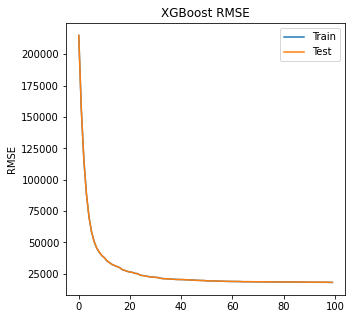

In [42]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()

pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

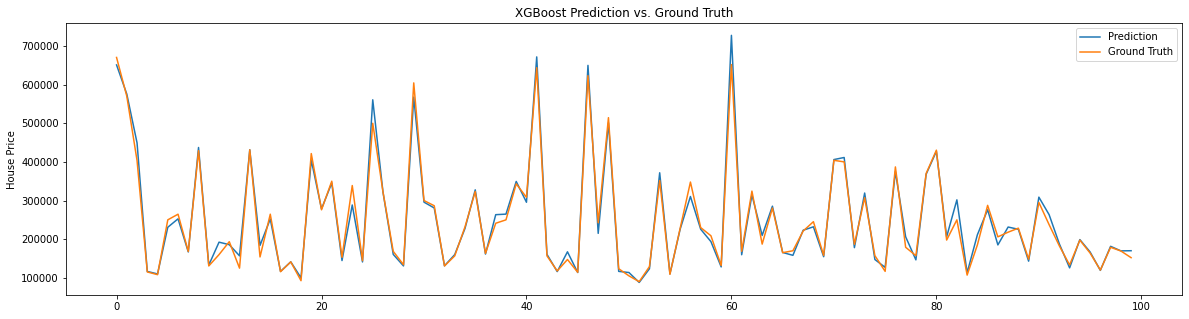

In [75]:
x_axis = range(0, 100)

fig, ax = pyplot.subplots(figsize=(20,5))
ax.plot(x_axis, xgb_pred[:100], label='Prediction')
ax.plot(x_axis, y_test[:100], label='Ground Truth')
ax.legend()

pyplot.ylabel('House Price')
pyplot.title('XGBoost Prediction vs. Ground Truth')
pyplot.show()

### House price and air quality

In [76]:
df = pd.read_csv('data/house_price_air_quality.csv')
df['Year'] = df['Year'].apply(lambda x: 2022 - int(x))
df.head()

,price,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,...,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Tulare,Tuolumne,Ventura,Yolo
0,226149.0,22,366,293,59,11,2,1,0,209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,226149.0,21,365,290,57,12,6,0,0,178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,226149.0,20,365,272,71,15,6,1,0,201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,226149.0,19,365,300,53,9,3,0,0,172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,226149.0,18,366,236,114,16,0,0,0,136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xgb = xgboost.XGBRegressor(random_state=123)

In [79]:
params = { 'max_depth': [3,6],
           'n_estimators': [100, 300, 500]
         }

xgb_gscv = GridSearchCV(estimator=xgb, 
                        param_grid=params,
                        scoring='explained_variance', 
                        verbose=2)

xgb_gscv.fit(
    X_train, 
    y_train
)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=  16.4s
[CV] END ......................max_depth=3, n_estimators=100; total time=  18.7s
[CV] END ......................max_depth=3, n_estimators=100; total time=  18.7s
[CV] END ......................max_depth=3, n_estimators=100; total time=  18.2s
[CV] END ......................max_depth=3, n_estimators=100; total time=  19.2s
[CV] END ......................max_depth=3, n_estimators=300; total time= 1.3min
[CV] END ......................max_depth=3, n_estimators=300; total time= 1.2min
[CV] END ......................max_depth=3, n_estimators=300; total time= 1.0min
[CV] END ......................max_depth=3, n_estimators=300; total time= 1.1min
[CV] END ......................max_depth=3, n_estimators=300; total time= 1.0min
[CV] END ......................max_depth=3, n_estimators=500; total time= 1.8min
[CV] END ......................max_depth=3, n_est

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=123,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
       

In [80]:
print("Best parameters:", xgb_gscv.best_params_)
print("Best Variance Explained: ", xgb_gscv.best_score_)

Best parameters: {'max_depth': 6, 'n_estimators': 300}
Best Variance Explained:  0.9788455561590291


In [81]:
xgb_pred = xgb_gscv.predict(X_test)

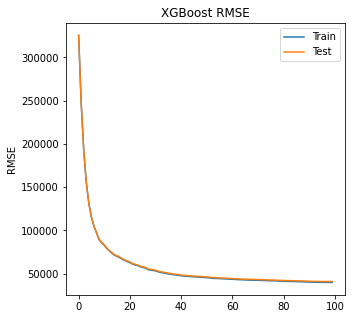

In [51]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()

pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

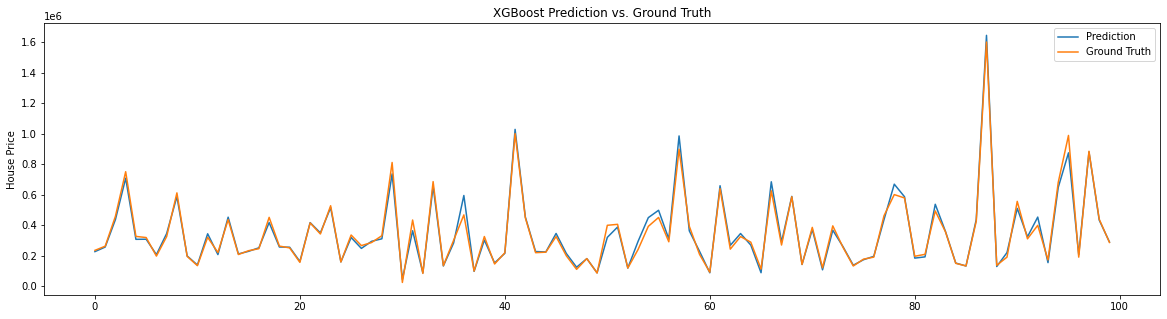

In [82]:
x_axis = range(0, 100)

fig, ax = pyplot.subplots(figsize=(20,5))
ax.plot(x_axis, xgb_pred[:100], label='Prediction')
ax.plot(x_axis, y_test[:100], label='Ground Truth')
ax.legend()

pyplot.ylabel('House Price')
pyplot.title('XGBoost Prediction vs. Ground Truth')
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

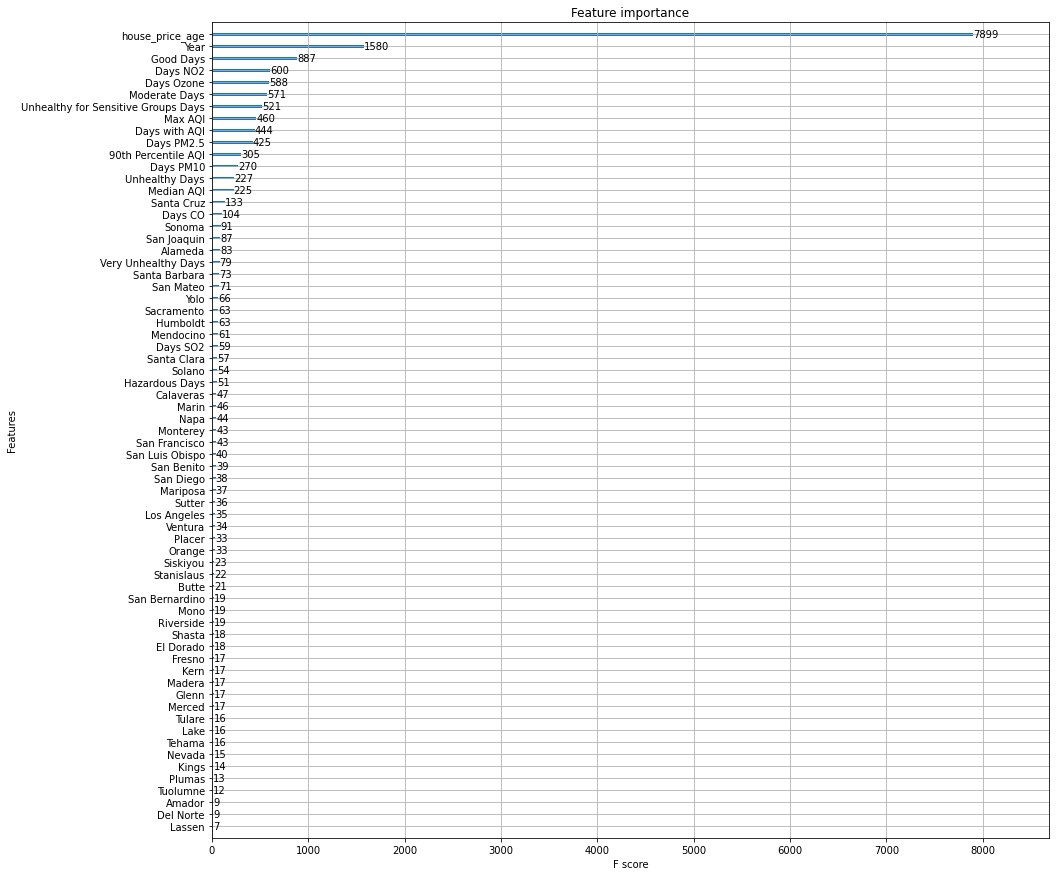

In [89]:
from xgboost import plot_importance

fig, ax = pyplot.subplots(figsize=(15, 15))
plot_importance(xgb_gscv.best_estimator_, ax=ax)

### House price and oil wells

In [90]:
df = pd.read_csv('data/house_price_oil_wells.csv')
df.head()

,price,SpudAge,ActiveWellRatio,house_price_age,Alameda,Amador,Butte,Del Norte,Fresno,Glenn,...,Siskiyou,Solano,Sonoma,Stanislaus,Sutter,Tehama,Tulare,Ventura,Yolo,Yuba
0,226149.0,60.547368,0.063158,32,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,219306.0,60.547368,0.063158,32,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225162.0,60.547368,0.063158,32,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,229333.0,60.547368,0.063158,32,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,232291.0,60.547368,0.063158,32,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
xgb = xgboost.XGBRegressor(random_state=123)

params = { 'max_depth': [6],
           'n_estimators': [100]
         }

xgb_gscv = GridSearchCV(estimator=xgb, 
                        param_grid=params,
                        scoring='explained_variance', 
                        verbose=2)

xgb_gscv.fit(
    X_train, 
    y_train
)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.6s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ......................max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ......................max_depth=3, n_estimators=300; total time=   1.6s
[CV] END ......................max_depth=3, n_estimators=300; total time=   1.4s
[CV] END ......................max_depth=3, n_estimators=300; total time=   1.5s
[CV] END ......................max_depth=3, n_estimators=300; total time=   1.5s
[CV] END ......................max_depth=3, n_estimators=500; total time=   2.5s
[CV] END ......................max_depth=3, n_est

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=123,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
       

In [92]:
print("Best parameters:", xgb_gscv.best_params_)
print("Best Variance Explained: ", xgb_gscv.best_score_)

Best parameters: {'max_depth': 6, 'n_estimators': 100}
Best Variance Explained:  0.9758515982572323


In [94]:
xgb_pred = xgb_gscv.predict(X_test)

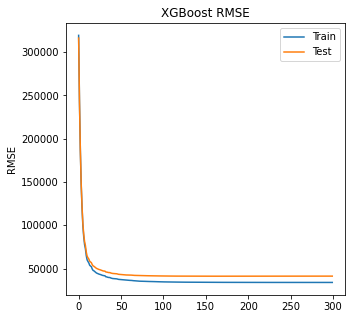

In [60]:
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()

pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

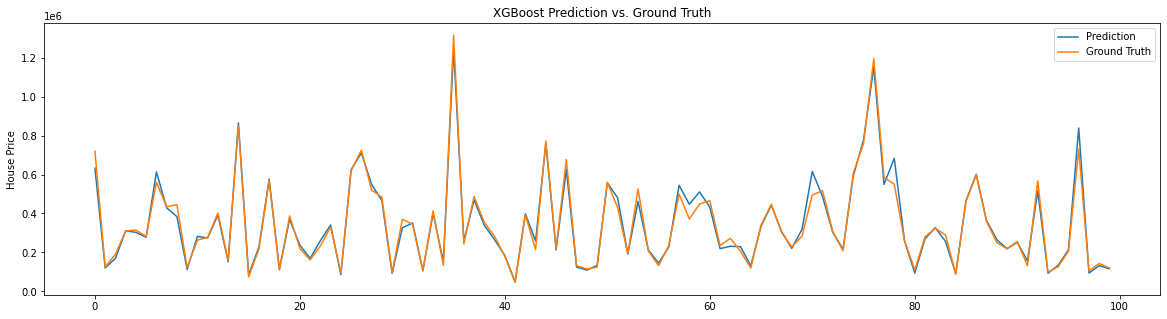

In [95]:
x_axis = range(0, 100)

fig, ax = pyplot.subplots(figsize=(20,5))
ax.plot(x_axis, xgb_pred[:100], label='Prediction')
ax.plot(x_axis, y_test[:100], label='Ground Truth')
ax.legend()

pyplot.ylabel('House Price')
pyplot.title('XGBoost Prediction vs. Ground Truth')
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

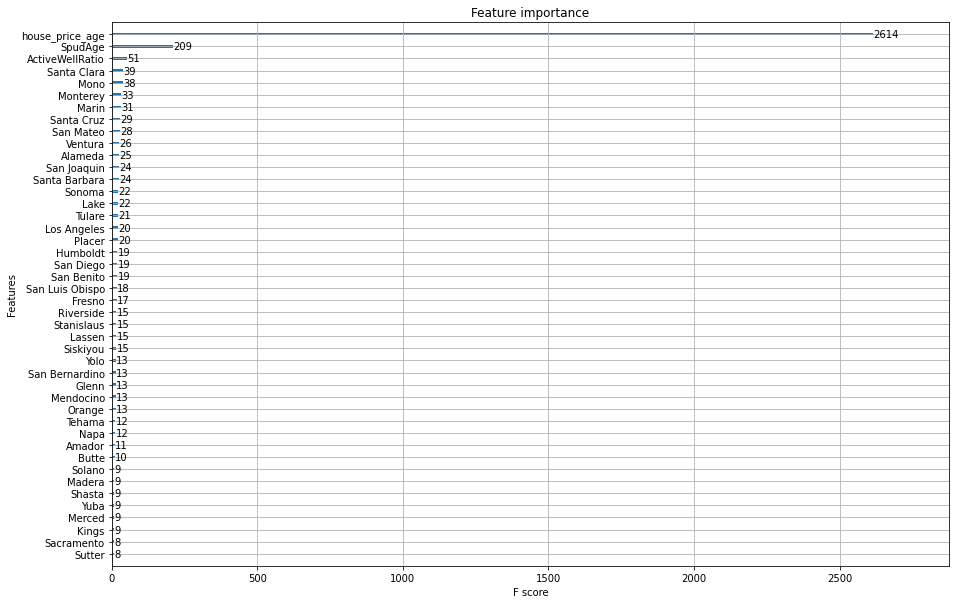

In [97]:
fig, ax = pyplot.subplots(figsize=(15, 10))
plot_importance(xgb_gscv.best_estimator_, ax=ax)

### Final Prediction